<a href="https://colab.research.google.com/github/Ashujain121/Employee-Promotion-Prediction-/blob/master/HR_Employee_promotion_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Reading the dataset*

In [3]:
!pip install sweetviz

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 71kB 5.5MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [4]:
# lets import all the required libraries

# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for exploratory data analysis
import sweetviz

# for machine learning
import sklearn
import imblearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
train = pd.read_csv('sample_data/Train(1).csv')
test = pd.read_csv('sample_data/Test (1).csv')

### ***Examining the data***

In [20]:
# lets check the shape of the train and test datasets
print("Shape of the Training Data :", train.shape)
print("Shape of the Test Data :", test.shape)

Shape of the Training Data : (54808, 14)
Shape of the Test Data : (23490, 13)


In [21]:
train.head(6)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0


In [22]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


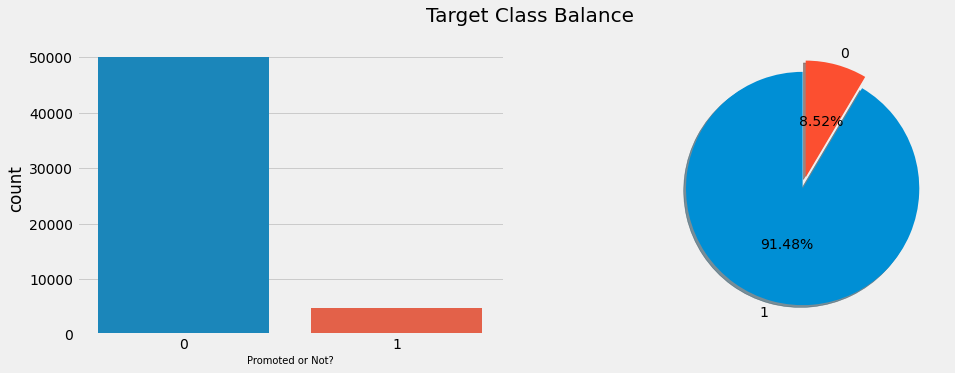

In [24]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
plt.pie(train['is_promoted'].value_counts(), explode = [0,0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 20)
plt.show()

In [25]:
report = sweetviz.compare([train,'Train'], [test,'Test'], 'is_promoted' )  
report.show_html('Report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)


Creating Associations graph... DONE!
Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Descriptive Statistics

* Descriptive Statistics is one of the most Important Step to Understand the Data and take out Insights
* First we will the Descriptive Statistics for the Numerical Columns
* for Numerical Columns we check for stats such as Max, Min, Mean, count, standard deviation, 25 percentile, 50 percentile, and 75 percentile.
* Then we will check for the Descriptive Statistics for Categorical Columns
* for Categorical Columns we check for stats such as count, frequency, top, and unique elements.

In [26]:
# lets check descriptive statistics for numerical columns
train.iloc[:,1:].describe().style.background_gradient(cmap = 'copper')

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [27]:
# lets check descriptive statistics for categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


a = 0
for ele in range(train.shape[0]):
  if train.loc[ele,'gender']=='m':
    a = a+1
print(a)

In [28]:
# Lets make an interactive function to check the statistics of these numerical columns at a time

@interact
def check(column = list(train.select_dtypes('number').columns[1:8])):
    print("Maximum Value :", train[column].max())
    print("Minimum Value :", train[column].min())
    print("Mean : {0:.2f}".format(train[column].mean()))
    print("Median :", train[column].median())
    print("Standard Deviation :  {0:.2f}".format(train[column].std()))

interactive(children=(Dropdown(description='column', options=('no_of_trainings', 'age', 'previous_year_rating'…

In [29]:
#@title Missing values Imputation




* Treatment of Missing Values is very Important Step in any Machine Learning Model Creation 
* Missing Values can be cause due to varios reasons such as the filling incomplete forms, values not available, etc
* There are so many types of Missing Values such as 
     * Missing values at Random
     * Missing values at not Random
     * Missing Values at Completely Random
* What can we do to Impute or Treat Missing values to make a Good Machine Learning Model
    * We can use Business Logic to Impute the Missing Values
    * We can use Statistical Methods such as Mean, Median, and Mode.
    * We can use ML Techniques to impute the Missing values
    * We can delete the Missing values, when the Missing values percentage is very High.
    
* When to use Mean, and when to use Median?
    * We use Mean, when we do not have Outliers in the dataset for the Numerical Variables.
    * We use Median, when we have outliers in the dataset for the Numerical Variables.
    * We use Mode, When we have Categorical Variables.

In [30]:
# missing values in training data set

# lets calculate the total missing values in the dataset
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the total missing values in the dataset
test_total = test.isnull().sum()

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

# lets check the head
train_missing_data.style.background_gradient()

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000


In [31]:
train.dtypes[train.isnull().any()]

education                object
previous_year_rating    float64
dtype: object

In [32]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [33]:
# lets impute the missing values in the Testing Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Testing Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Testing Data : 0


In [34]:
#@title Univariate Analysis


Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

* This is an Essential step, to understand the variables present in the dataset one by one.
* First, we will check the Univariate Analysis for Numerical Columns to check for Outliers by using Box plots.
* Then, we will use Distribution plots to check the distribution of the Numerical Columns in the Dataset.
* After that we will check the Univariate Analysis for Categorical Columns using Pie charts, and Count plots.
* We Use Pie charts, when we have very few categories in the categorical column, and we use count plots we have more categorises in the dataset.

In [35]:
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


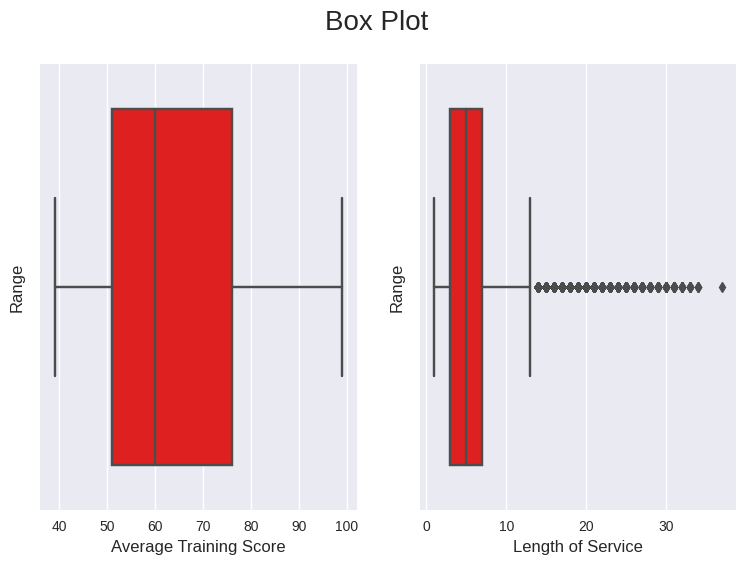

In [36]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

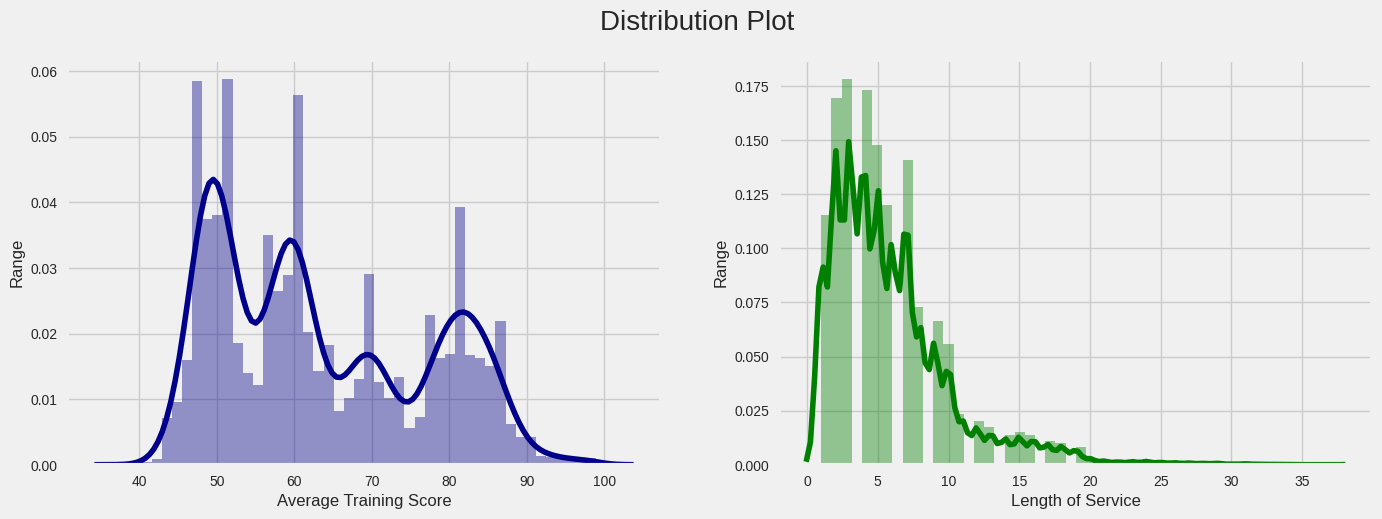

In [37]:
# Lets check the distribution for the columns for which we suspect for the outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Distribution plot for Average training score
plt.subplot(1, 2, 1)
sns.distplot(train['avg_training_score'], color = 'darkblue')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Distribution plot for Length of Service
plt.subplot(1, 2, 2)
sns.distplot(train['length_of_service'], color = 'green')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Distribution Plot', fontsize = 20)
plt.show()

In [38]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


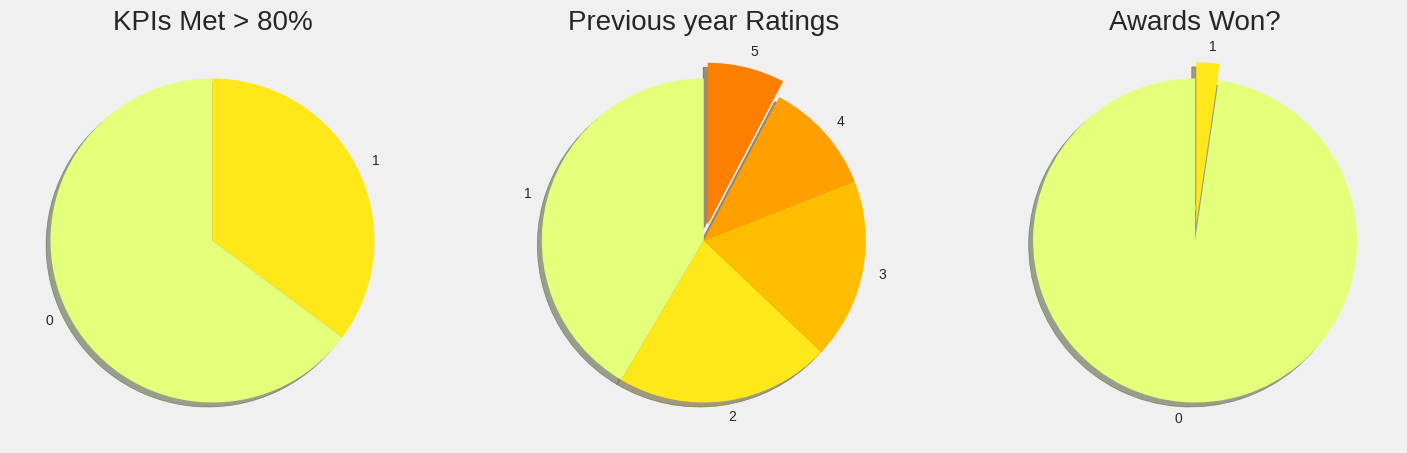

In [39]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)



plt.show()

We, can see that there are some pie charts, we have for representing KPIs, Previous year Ratings, and Awards Won?
Also, The one Big Pattern is that only some of the employees could reach above 80% of KPIs set.
Most of the Employees have a very low rating for the previous year, and
very few employees, probably 2% of them could get awards for their work, which is normal.

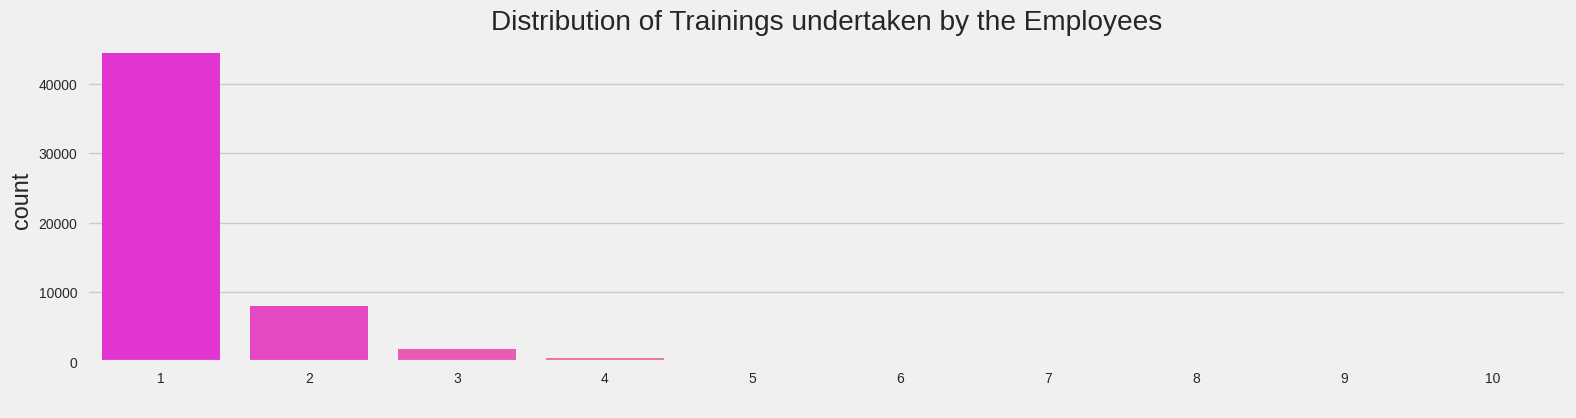

In [40]:
# lets check the distribution of trainings undertaken by the employees

plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

The abov Countplot, where are checking the distribution of trainings undertaken by the Employee, It is clearly visible that 80 % of the employees have taken the training only once, and there are negligible no. of employees, who took trainings more than thrice.

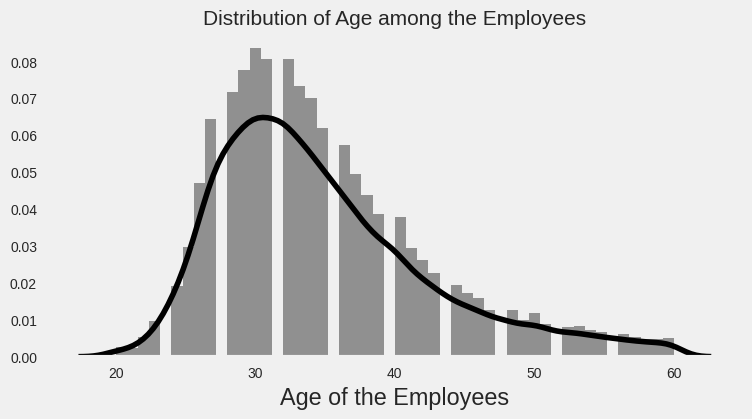

In [41]:
# lets check the Age of the Employees

plt.rcParams['figure.figsize'] = (8, 4)
sns.distplot(train['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

In [42]:
# lets now check the columns which are categorical
train.select_dtypes('object').head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


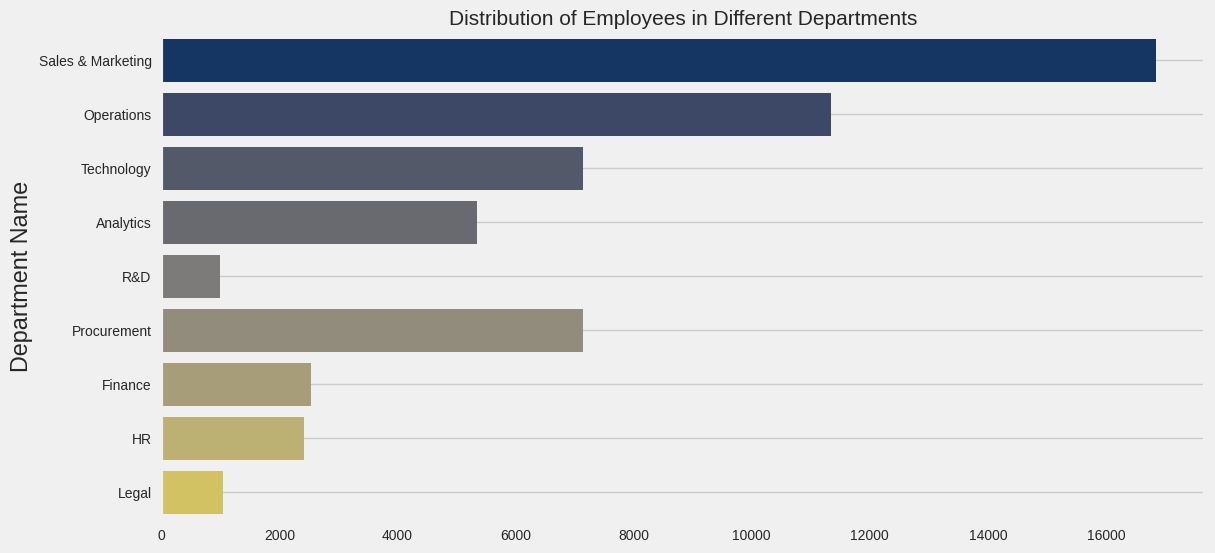

In [43]:
# lets check different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

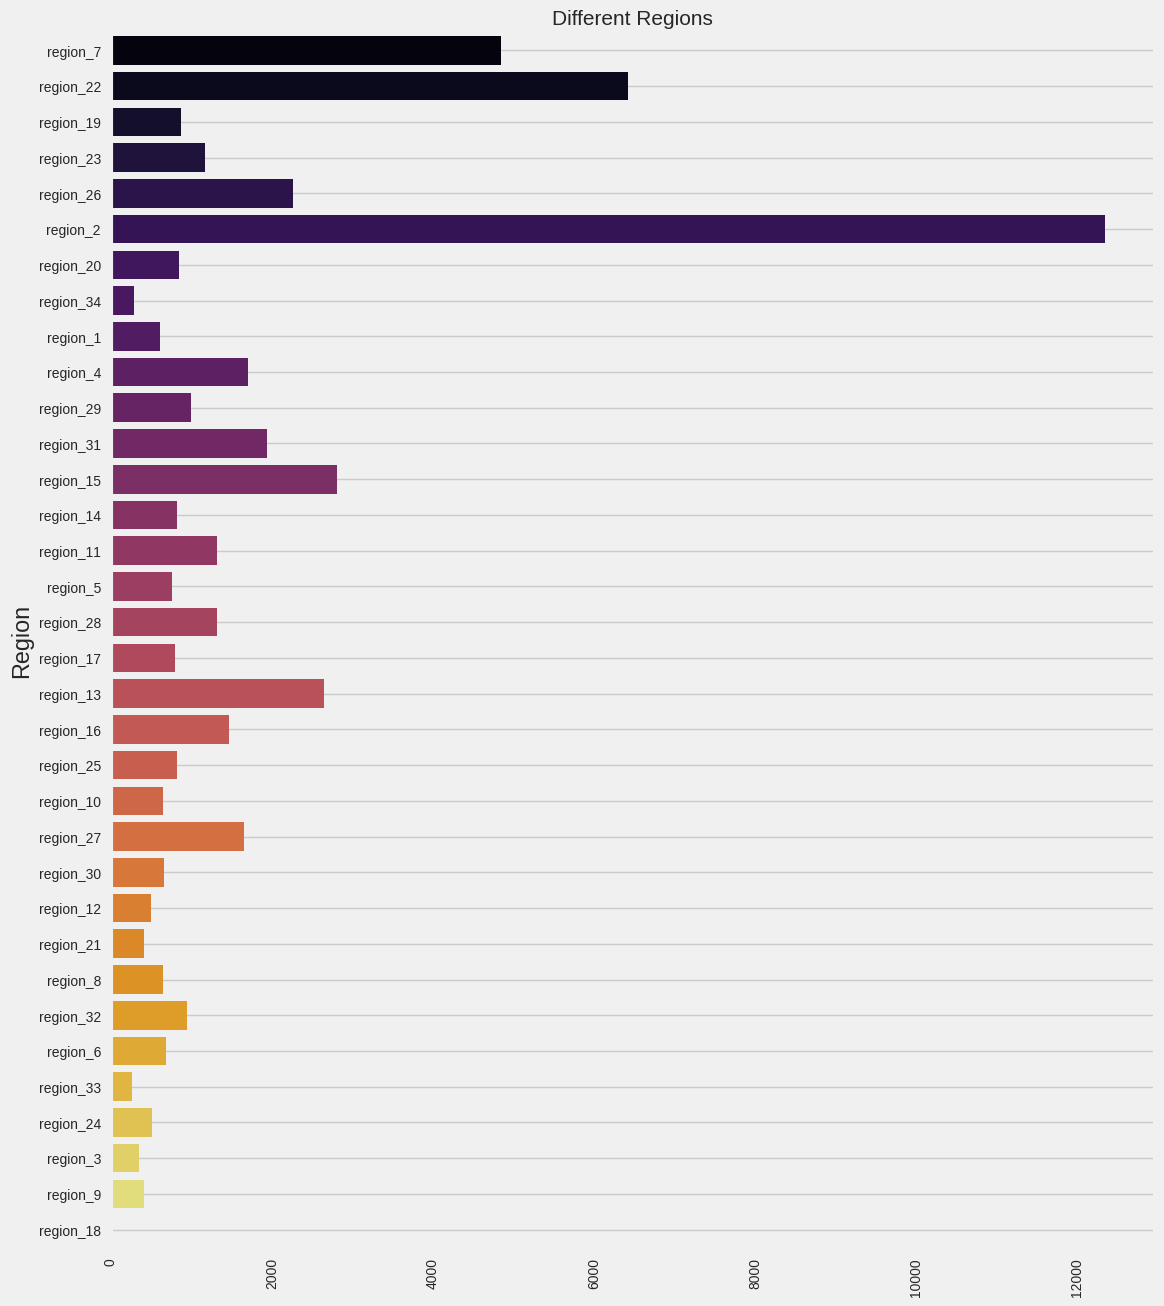

In [44]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

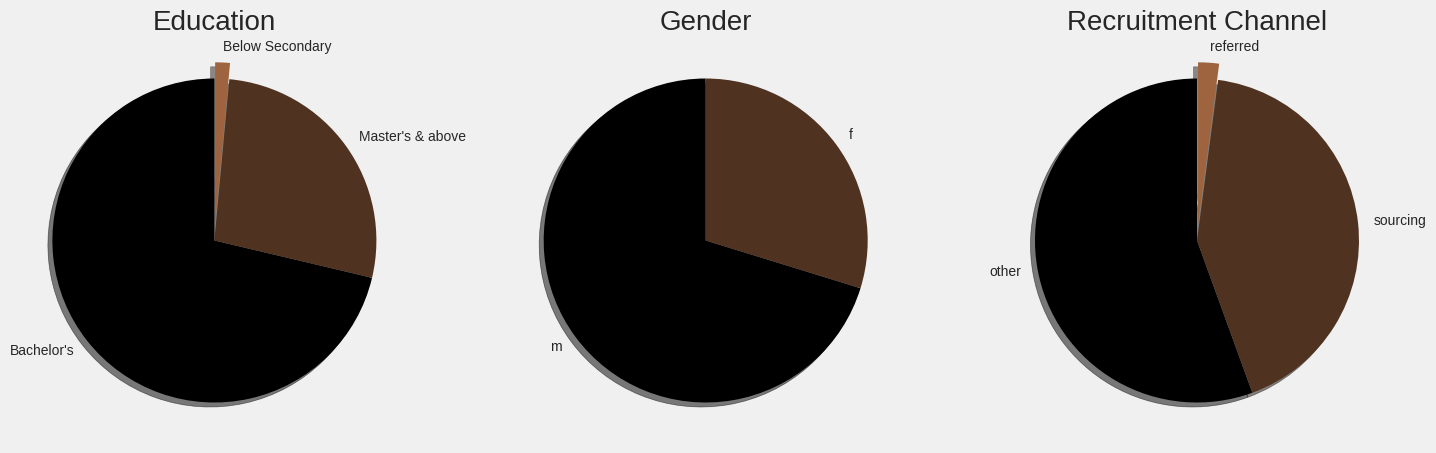

In [45]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

From, the above pie charts displayed for representing Education, Gender, and Recruitment Channel.

lets infer the Main Highlights
Very Few employees are actually working only after their Secondary Education, 
Obviously Females are again in Minority as compared to their Male Counterparts.
and the Recruitment Channel, says that the Referred Employees are very less, i.e., most of the employees are recruited either by sourcing, or some other recruitment agencies, sources etc.

In [46]:
# interactive function for plotting univariate charts for categorical data

plt.rcParams['figure.figsize'] = (15, 4)
@interact_manual
def check(column = list(train.select_dtypes('object').columns),
          palette = ['cividis','copper','spring','Reds','Blues']):
    sns.countplot(train[column], palette = palette)
   
    plt.show()

interactive(children=(Dropdown(description='column', options=('department', 'region', 'education', 'gender', '…

## Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

* Types of Bivariate Analysis
    * Categorical vs Categorical 
    * Categorical vs Numerical
    * Numerical vs Numerical
    
* First, we will perform Categorical vs Categorical Analysis using Stacked and Grouped Bar Charts with the help of crosstab function.
* Second, we will perform Categorical vs Numerical Analysis using Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, Violin Plots, etc
* Atlast, we will perform Numerical vs Numerical Analysis using Scatter plots.

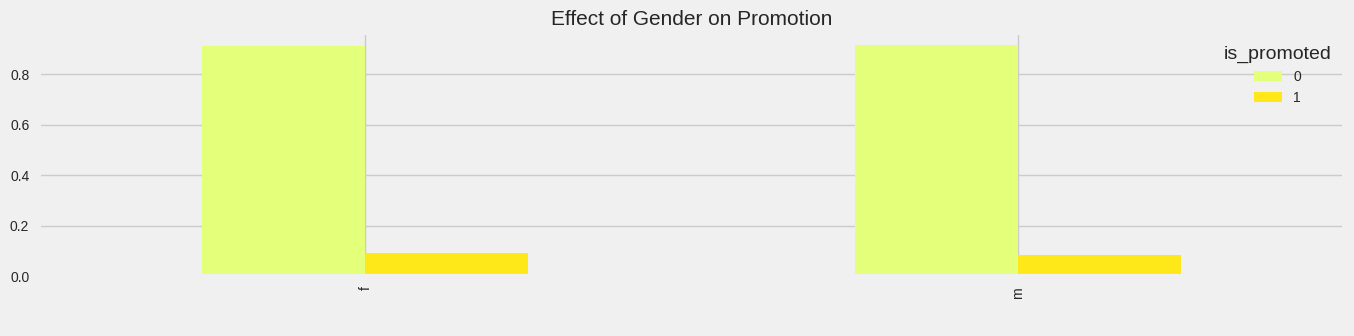

In [47]:
# Lets compare the Gender Gap in the promotion

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

As we have already seen that the Females are in Minority, but when it comes to Promotion, they are competing with their Men Counterparts neck-to-neck. That's a great Inference.

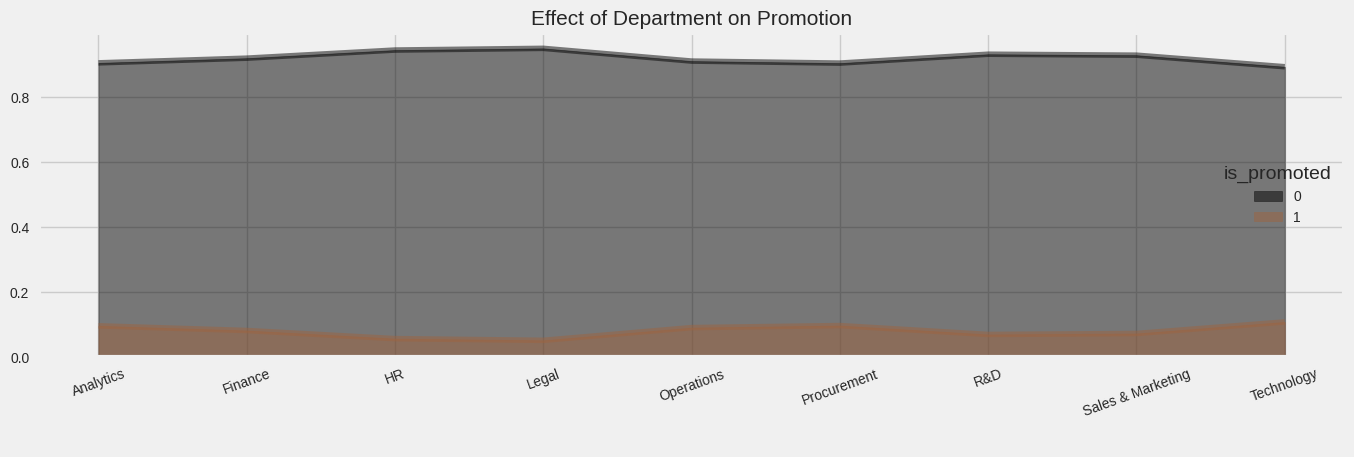

In [48]:
# lets compare the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False, color = colors)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

From, the above chart we can see that almost all the Departments have a very similar effect on Promotion. So, we can consider that all the Departments have a similar effect on the promotion. Also, this column comes out to be lesser important in making a Machine Learning Model, as it does not contribute at all when it comes to Predicting whether the Employee should get Promotion.

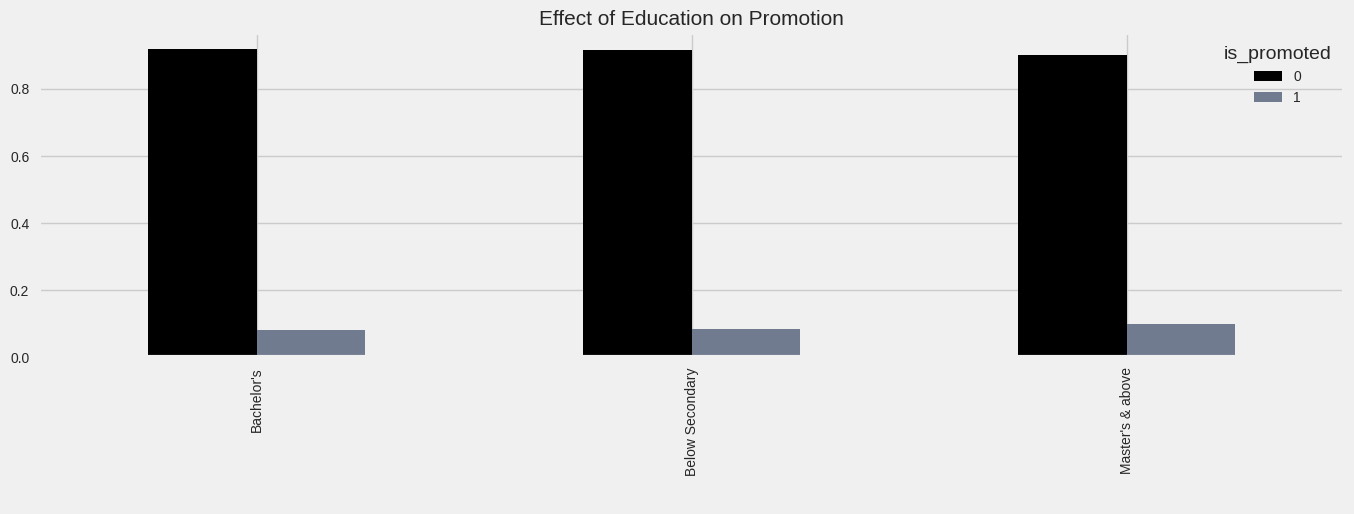

In [49]:
# lets compare the effect of Education and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['education'], train['is_promoted'])
colors = plt.cm.bone(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Education on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

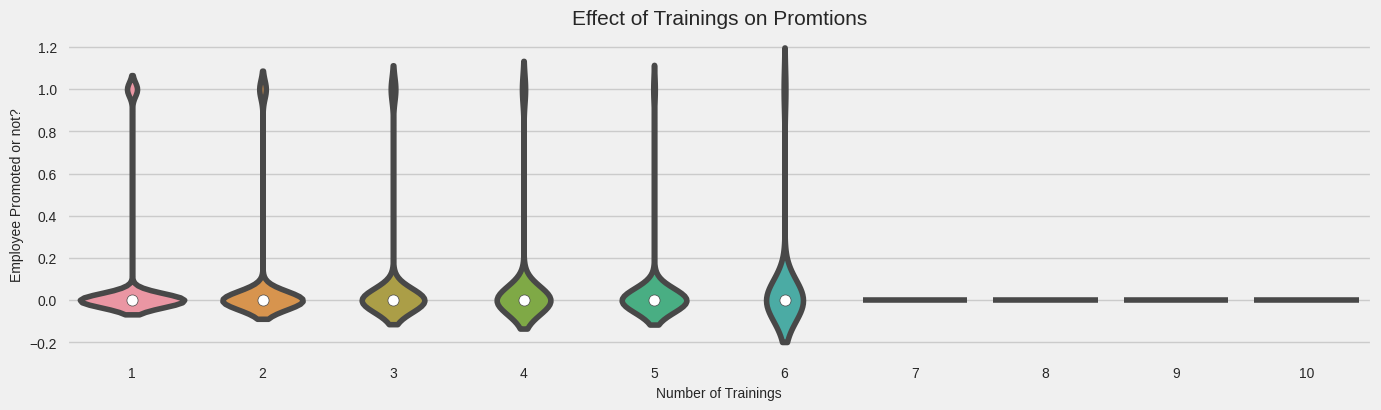

In [50]:
# checking the effect of number of trainings on promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.violinplot(train['no_of_trainings'], train['is_promoted'])
plt.title('Effect of Trainings on Promtions', fontsize = 15)
plt.xlabel('Number of Trainings', fontsize = 10)
plt.ylabel('Employee Promoted or not?', fontsize = 10)
plt.show()

Again, after checking this plot, it becomes clear that the employee who take more than 5 trainings are probably not going to get a promotion.

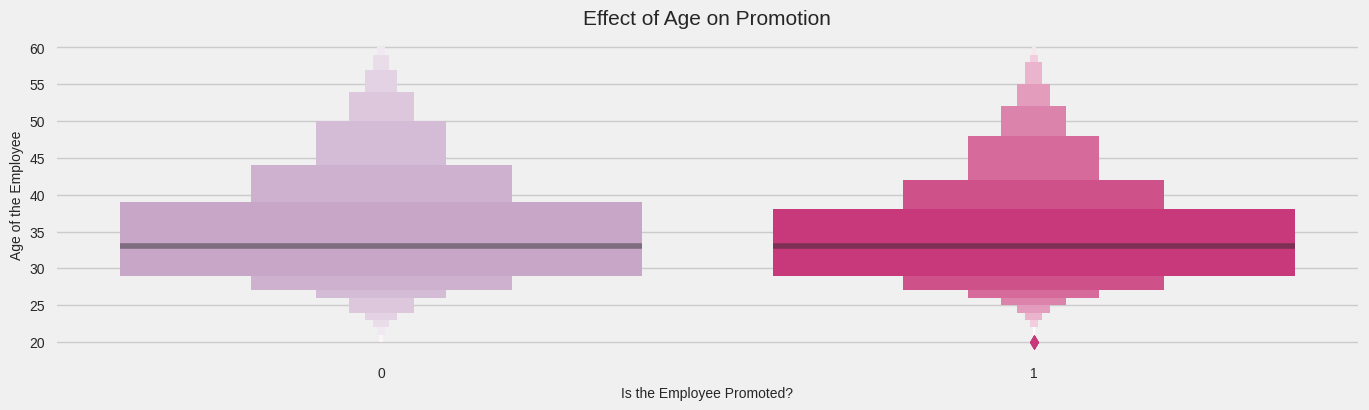

In [51]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

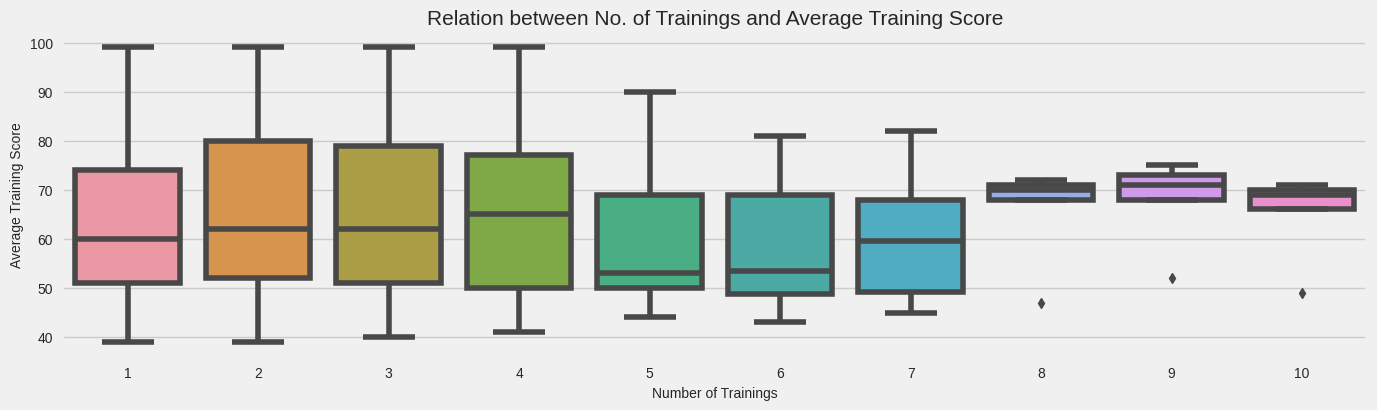

In [52]:
# lets check relation between number of trainings and average training score

plt.rcParams['figure.figsize'] = (15,4)
sns.boxplot(train['no_of_trainings'], train['avg_training_score'])
plt.title('Relation between No. of Trainings and Average Training Score', fontsize = 15)
plt.xlabel('Number of Trainings', fontsize = 10)
plt.ylabel('Average Training Score', fontsize = 10)
plt.show()

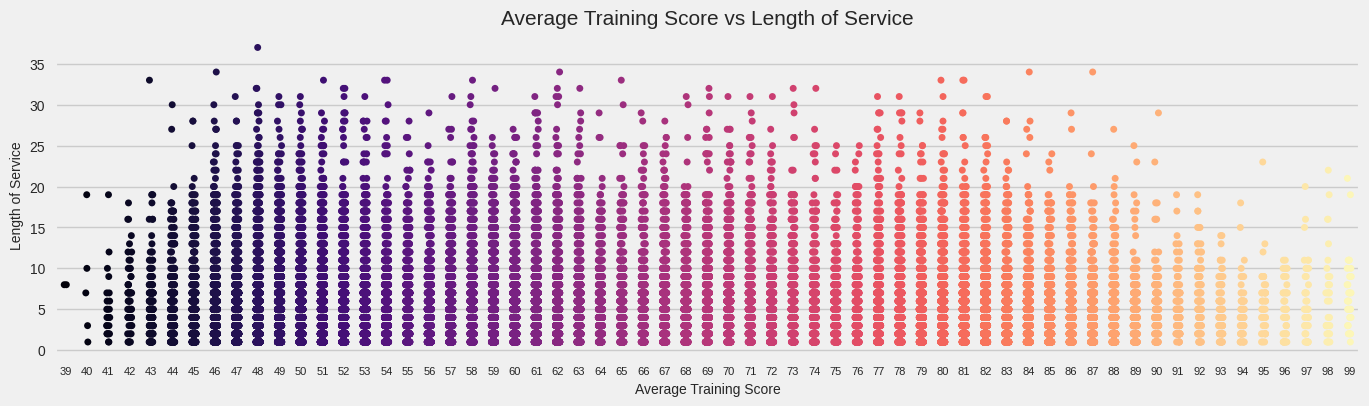

In [53]:
# lets check the relation between the length of service and the average training score

plt.rcParams['figure.figsize'] = (15,4)
sns.stripplot(train['avg_training_score'], train['length_of_service'], palette = 'magma')
plt.title('Average Training Score vs Length of Service', fontsize = 15)
plt.xlabel('Average Training Score', fontsize = 10)
plt.ylabel('Length of Service', fontsize = 10)
plt.xticks(fontsize = 8)
plt.show()

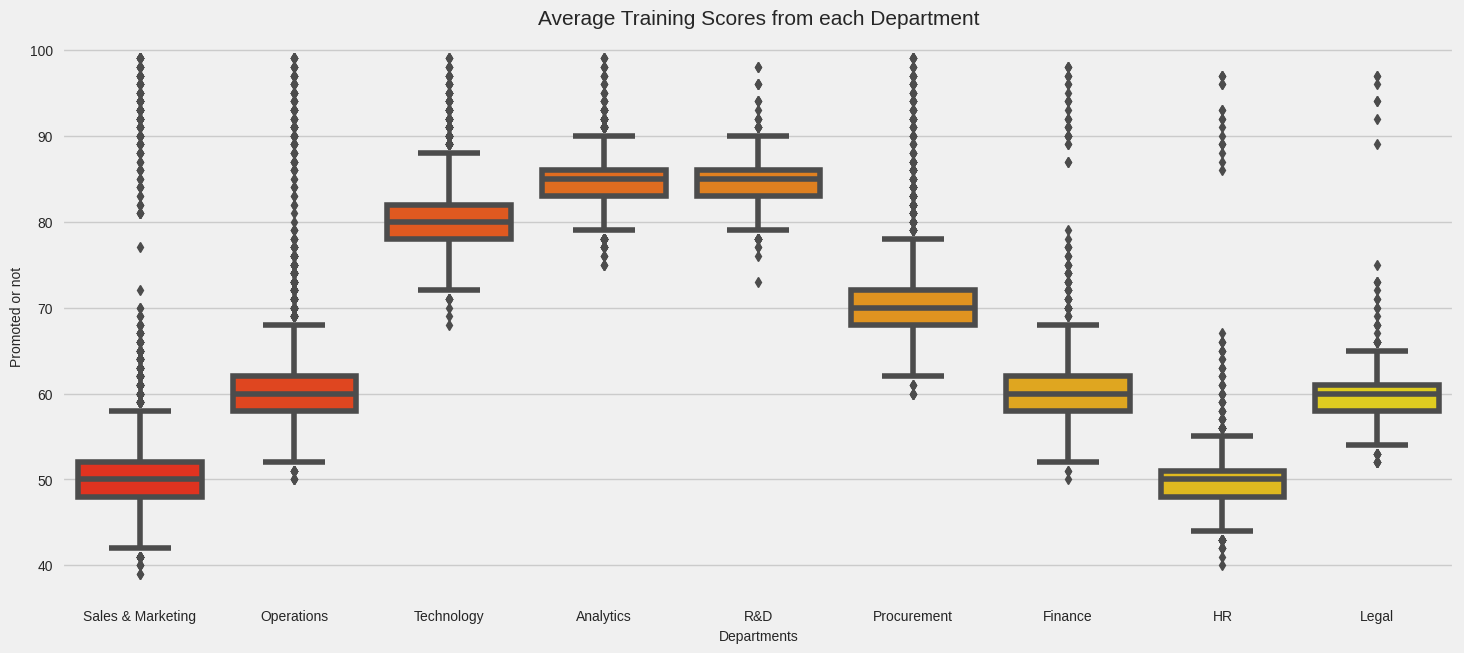

In [54]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

In [55]:
# lets make an Interactive Function for Bivariate Analysis

plt.rcParams['figure.figsize'] = (15, 4)
@interact_manual
def bivariate_plot(column1 = list(train.select_dtypes('object').columns),
                   column2 = list(train.select_dtypes('number').columns[1:])):
    sns.boxplot(train[column1], train[column2])

interactive(children=(Dropdown(description='column1', options=('department', 'region', 'education', 'gender', …

In [56]:
# lets make an Interactive Function for Bivariate Analysis

plt.rcParams['figure.figsize'] = (15, 4)
@interact_manual
def bivariate_plot(column1 = list(train.select_dtypes('object').columns),
                   column2 = list(train.select_dtypes('number').columns[1:])):
    sns.boxenplot(train[column1], train[column2])

interactive(children=(Dropdown(description='column1', options=('department', 'region', 'education', 'gender', …

## Multivariate Analysis

Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

* First, we will use the Correlation Heatmap to check the correlation between the Numerical Columns
* Then we will check the ppscore or the Predictive Score to check the correlation between all the columns present in the data.
* Then, we will use Bubble Charts, split Violin plots, Hue with Bivariate Plots.

Here, we can see some obvious results, that is Length of Service, and Age are Highly Correlated,
Also, KPIs, and Previous year rating are correlated to some extent, hinting that there is some relation.

In [57]:
!pip install ppscore

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for ppscore: filename=ppscore-1.0.0-py2.py3-none-any.whl size=12427 sha256=6c3ff4437918942030030fbbc1940fbab90bb564519fbe9f807b038d147a96e3
  Stored in directory: /root/.cache/pip/wheels/20/50/9c/eb129e849166531526f18d596da06b45eb5077e5edb406eeba
Successfully built ppscore


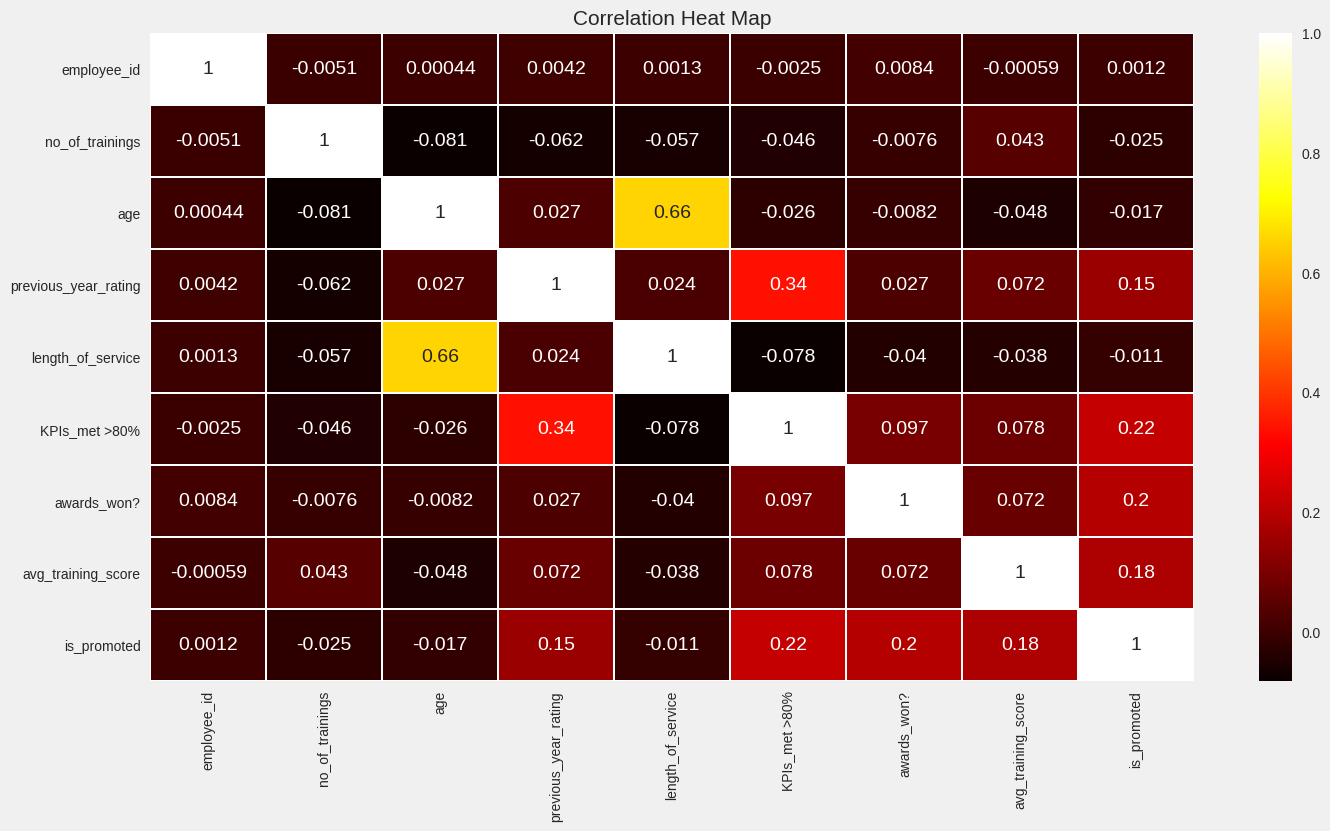

In [58]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'hot')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

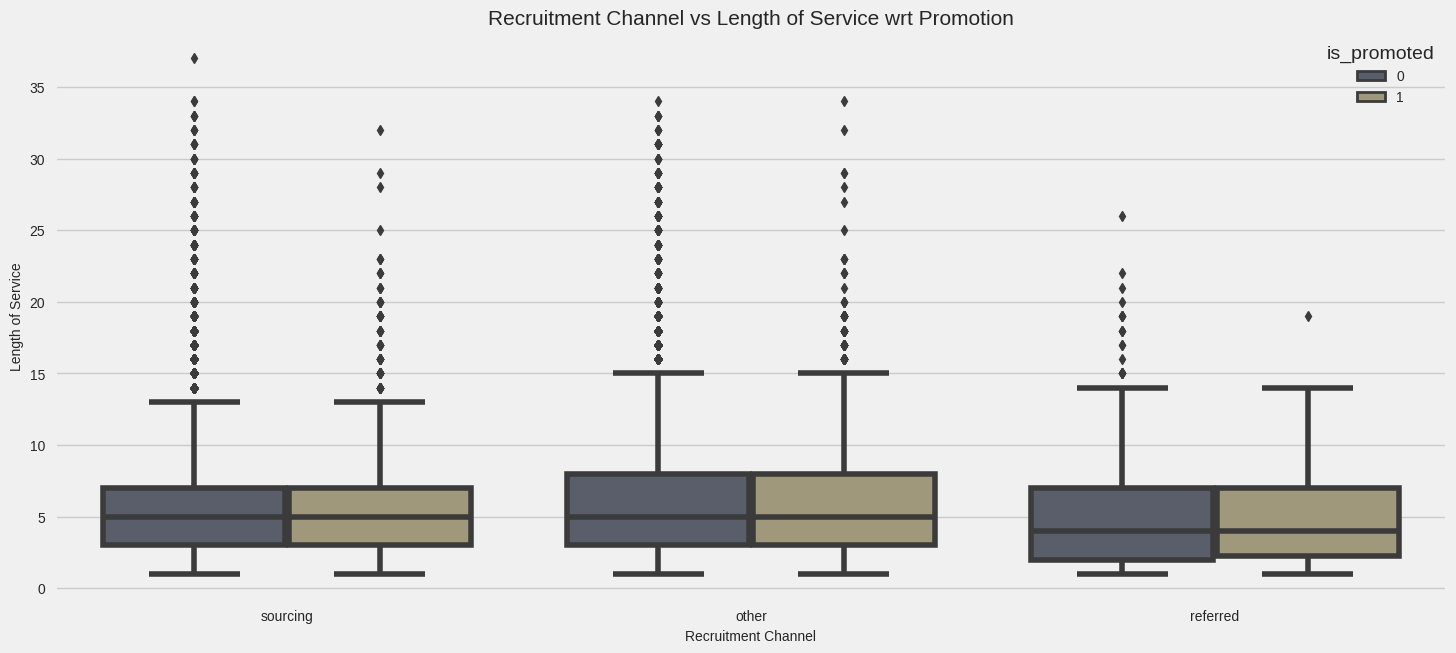

In [59]:
# lets check the relation of Recruitment Channel, length of service and Promotions when they won awards ?

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['recruitment_channel'],
            train['length_of_service'],
            hue = train['is_promoted'],
            palette = 'cividis')
plt.title('Recruitment Channel vs Length of Service wrt Promotion', fontsize = 15)
plt.ylabel('Length of Service', fontsize = 10)
plt.xlabel('Recruitment Channel', fontsize = 10)
plt.show()

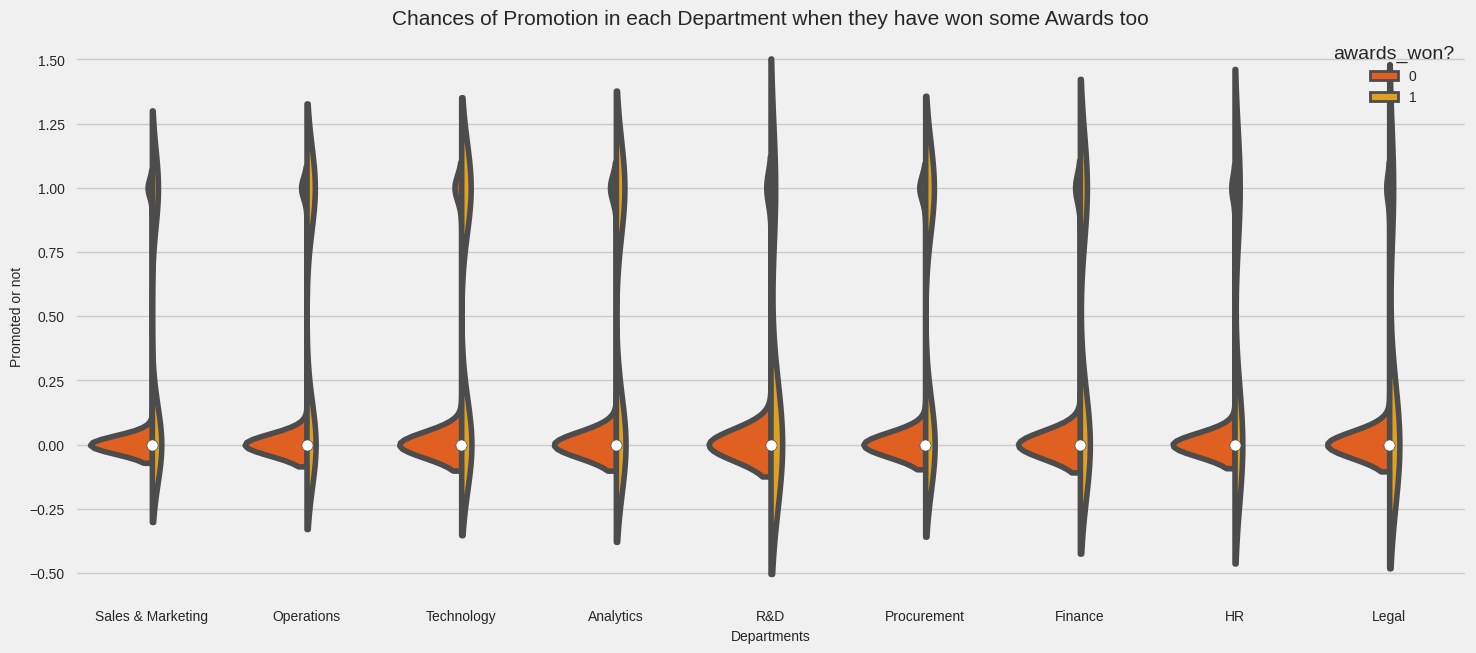

In [60]:
# lets check the relation of Departments and Promotions when they won awards ?

plt.rcParams['figure.figsize'] = (16, 7)
sns.violinplot(train['department'], train['is_promoted'], hue = train['awards_won?'], split = True, palette = 'autumn')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

In [61]:
#@title Feature Engineering


In [62]:
#  Here, we are only going to perform Feature Engineering by Aggregating some features together.

# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [63]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it.

train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

# lets check the columns in train and test data set after feature engineering
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')

In [64]:
#@title Grouping and Filtering


In [65]:
## lets check the relation between KPIs Met and Promotion

x = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
x.style.bar()

is_promoted,0,1
KPIs_met >80%,,
0,34111,1406
1,16029,3262


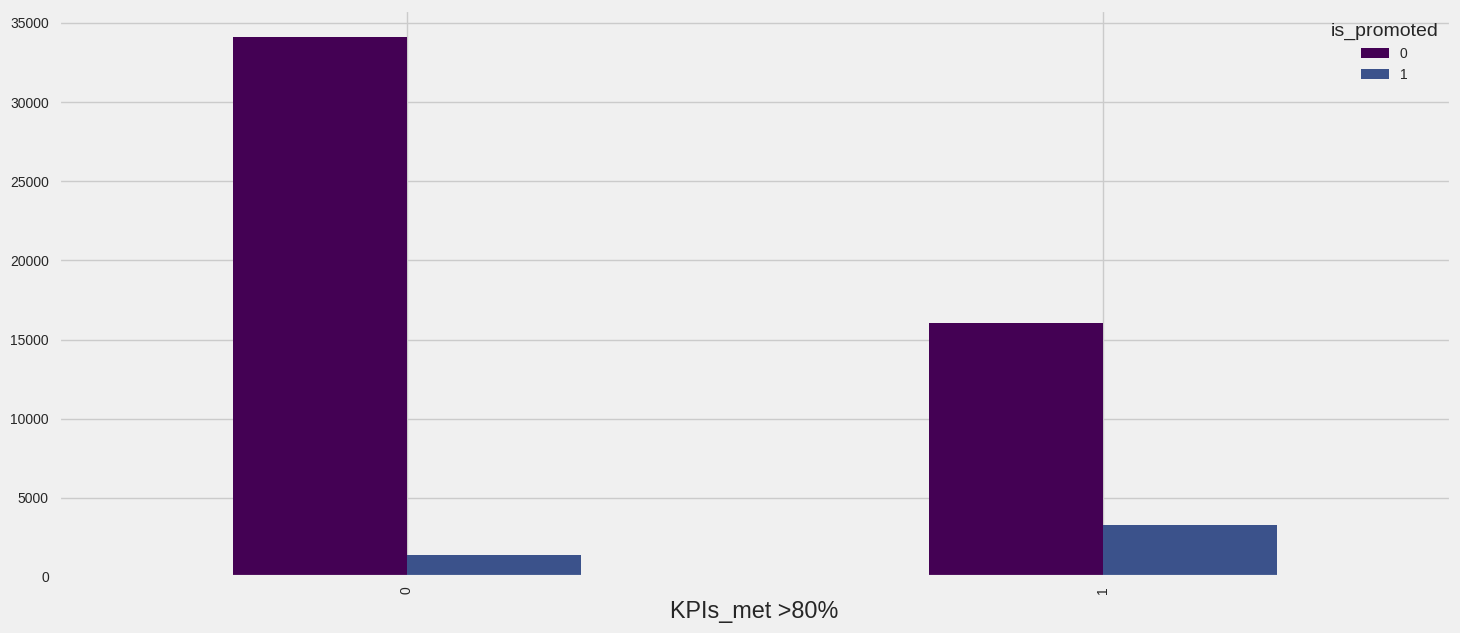

In [66]:
x.plot(kind='bar', stacked=False, color= plt.cm.viridis(np.linspace(0,1,5)))

In [67]:
## lets check the relation between the Awards and Promotion

x = pd.crosstab(train['awards_won?'], train['is_promoted'])
x.style.background_gradient(cmap = 'Blues')

is_promoted,0,1
awards_won?,,
0,49429,4109
1,711,559


In [79]:
# let's check the no. of employees who won awards from each department

series = train.groupby('department').agg('count')['awards_won?'].sort_values(ascending=False)
series

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: awards_won?, dtype: int64

In [76]:
# lets group the employees based on their Education

@interact
def group(column = list(train.select_dtypes('object').columns)):
    return train[[column, 'is_promoted']].groupby([column]).agg(['count',
                                                'sum', 'mean','min','max']).style.background_gradient(cmap = 'viridis')

interactive(children=(Dropdown(description='column', options=('department', 'education', 'gender'), value='dep…

In [80]:
## lets use the interactive function to make it more reusable

@interact
def group_operations(column = list(train.select_dtypes('object').columns),
                     column2 = list(train.select_dtypes('number').columns)[1:]):
    return train[[column, column2]].groupby([column]).agg('count').style.background_gradient(cmap = 'Wistia')

interactive(children=(Dropdown(description='column', options=('department', 'education', 'gender'), value='dep…

In [81]:
# lets get the names of all the employees who have taken trainings more than 7 Times

@interact
def check(column = 'no_of_trainings', x = 5):
    y = train[train['no_of_trainings'] > x]
    return y['is_promoted'].value_counts()

interactive(children=(Text(value='no_of_trainings', description='column'), IntSlider(value=5, description='x',…

In [82]:
# lets also check the value counts of the number of trainings employee took.
train['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [83]:
# lets cap the values of number of trainings after 5, as the chances of promotion is negligible after 5th training 

train['no_of_trainings'] = train['no_of_trainings'].replace((6, 7, 8, 9, 10),(5, 5, 5, 5, 5))

# lets check the values of no. of trainings after capping the values
train['no_of_trainings'].value_counts()

1    44378
2     7987
3     1776
4      468
5      199
Name: no_of_trainings, dtype: int64

In [84]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 40
but, still got promotion.
''' 

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1,1.0,58
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1,1.0,58


In [85]:
# lets remove the above two columns as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (54808, 13)
After Deletion of the above two rows : (54806, 13)


In [86]:
# lets check how many of the employees have greater than 30 years of service and still do not get promotion

@interact
def check_promotion(x = 20):
    x = train[(train['length_of_service'] > x)]
    return x['is_promoted'].value_counts()
   

interactive(children=(IntSlider(value=20, description='x', max=60, min=-20), Output()), _dom_classes=('widget-…

In [87]:
#@title Dealing with Categorical Columns


In [88]:
## Lets check the categorical columns present in the data
train.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [89]:
# lets check the value counts for the education column
train['education'].value_counts()

Bachelor's          39076
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [91]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [92]:
# lets check the data after encoding
train.head(3)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50


In [93]:
#@title Splitting the data

In [94]:
# lets split the target data from the train data

y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (54806, 12)
Shape of the y : (54806,)
Shape of the x Test : (23490, 12)


In [95]:
#@title Resampling


In [96]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(100280, 12)
(100280,)


In [97]:
# lets also check the value counts of our target variable4

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    50140
1     4666
Name: is_promoted, dtype: int64
After Resampling :
1    50140
0    50140
Name: 0, dtype: int64


In [98]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (80224, 12)
Shape of the y Train : (80224, 1)
Shape of the x Valid : (20056, 12)
Shape of the y Valid : (20056, 1)
Shape of the x Test : (23490, 12)


In [99]:
#@title Feature Scaling


In [100]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

### **Machine Learning Predictive Modelling**


In [101]:
#@title Decision Tree


Training Accuracy : 0.9962978659752693
Testing Accuracy : 0.9415137614678899


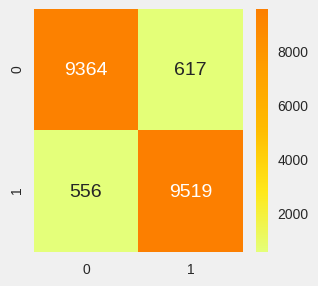

In [102]:
# Lets use Decision tree classifier to classify the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

## Feature Selection for Decision Tree Model

In [103]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
model = DecisionTreeClassifier() 
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
x_train = pd.DataFrame(x_train)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 12
Best features : Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')


As, we can clearly see that Decision Tree Classifier works much better as there are so many attributes which are are equally contributing to the cause, and generally linear Models such as Logistic Regression, wont perform very good, also there is a clear result using RFECV for feature selection, we can see that all the features are Important for Building the Model.

So, we go with the Decision Trees, but a Decision Tree has so many Parameters, lets check whether we can improve our Decision Tree Classifier Model, by changing some of the Default Parameters.

In [104]:
# lets take a look at the Classification Report

cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9981
           1       0.94      0.94      0.94     10075

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.94     20056
weighted avg       0.94      0.94      0.94     20056

